In [80]:
from qiskit import QuantumCircuit, transpile
# from qiskit.providers.aer import QasmSimulator
# from qiskit.providers.basicaer import QasmSimulatorPy
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeManila, FakeToronto, FakeJakartaV2, FakeProvider
from qiskit.circuit import Parameter
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.synthesis import QDrift, LieTrotter, SuzukiTrotter

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn.preprocessing as skp
from scipy.signal import savgol_filter
import os
import sys
from datetime import date
import pathlib
import inspect
import time
import glob
import pickle as pkl
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('..')) # qrc_surrogate
sys.path.append(module_path)
fig_path = f'{module_path}/figs'


from src.feedforward import QExtremeLearningMachine, CPolynomialFeedforward
from src.rewinding import QRewindingRC, QRewindingStatevectorRC,  QRewindingRC_Neat
from src.data import DataSource

from iqm.qiskit_iqm import IQMFakeAdonis
from iqm.qiskit_iqm import IQMProvider,transpile_to_IQM

server_url = "https://cocos.resonance.meetiqm.com/garnet"  # For example https://cocos.resonance.meetiqm.com/garnet
api_token = "w8yFvWKCBEj26UGLs6H/OpoPgJtyzhT05Qj89TTyWXsGa9IttUZ494AAS29Z0Cju"

SHOTS = 8000

backend = IQMProvider(server_url, token=api_token).get_backend()

In [2]:
List_of_Experiments=[]

In [3]:
Current_Dictionary={}

In [82]:
Batch_Set_Parameters = {'reset_instead_meas':False, # whether to reset or measure data qubits. Not relevant due to architecture.
                             'mend':False, # not used by this architecture.
                              'add_y_to_input':True, # In our experiment, this means use previous temperatures to predict future steps.
                              'mtype':'projection', # weak measurements are not supported.
                              'minc':True, # not used by this architecture.
                              'reseti':False, #reset before measurement. Not possible for us.
                              'resetm':False, #reset after measurement. Not relevant for us.
                              'xyoffset':1, # Use x_t, y_(t-1). Necessary for reactor data.

                              #Not used for real backend:
                              'sim':'aer_simulator', 
                              't1':50, 
                              'sim_method':'statevector', 
                              'sim_precision':'single',
                              'strip_metadata' : False,
                              'initial_layout' : None,
                              'verbose' : True

                              
                              
                              








                             
                             }

Batch_Free_Parameters = {'use_partial_meas':True, # determines whether measurement results from previous steps are used as features.
                              'lookback':4, # Number of previous time steps to be used
                              'restarting':False, # If true, uses all previous time steps.
                              'lookback_max':False, #If true AND restarting is false, will add time steps before t=0 for ensure lookback. CHECK!
                              'washout':0, # Ignore the first <washout> steps when fitting.
                              'preloading':0, # Repeat the first step <PREDLOADING> times in data.
                              'nmeas':2, # How many measurements are made after each rewind step. Only relevant when using partial measurements.
                              'nenccopies':1, #Number of times each data point is entered. Requires more qubits for each repetition. 
                              'set_past_y_to_0':False, #If true, t<0 steps are set to 0.
                              'use_true_y_in_val':False, # If false, Rollout predictions are performed.
                              'rseed':0, # Random seed used to choose parameters.
                              'log':True, # Save the results of the run. 
                              'add_x_as_feature':False, #Use x directly as a feature as well as circuit results.
                              'nyfuture':1, #How many steps in the future to predict. Only the next step is used for eval.
                               'delete_future_y':True, #If predicting multiple future steps, if no step exists, delete (True) or duplicate last (False).
                                'fitter':'sklearn_poly', # set to sklearn_poly for higher order fits.
                                'regression_model':'ridge', #Options: ‘ridge’, ‘lasso’, ‘elasticnet’, ‘linear’.
                                'regression_alpha':0.1, # Regularization parameter for ridge, lasso, elasticnet.
                                'regression_l1':0.1, #L1 ratio for elasticnet.
                                'poly_degree':3, #degree of sklearn_poly polynomial fits.
                                'nqubits':5, #Number of qubits for a single Unitary step.
                                'qctype':'ising_hadamard', # unitary choice. 
                                'qinit':'none', #perform an initial step.
                                'ftype':3, #N Body correllations to measure.
                                'nlayers':1, # How many times the unitary is applied at each step.'
                              'enctype':'angle', #How to input data into the circuits.
                              'encaxes':1, #How many times to encode the data.
                              'measaxes':3, #Number of different Pauli basis to measure.
                              'shots':8192,
                              'ising_t':1, 
                              'ising_jmax':1, 
                              'ising_h':0.1, 
                              'ising_wmax':10, 
                              'ising_random':True, 
                              'ising_jpositive':False, 
                              'ising_wpositive':False,
                              'sim':backend, 
                              'file_name':'New_Class_Testing_no_x',
                              'max_batch': 31250, #All relate to the batch code from Alessio.
                              'max_tries' : 10,
                              'max_circuit' : 1000,
                              'verbose': True,
                              'calibration_set_id' : None,
                              'qubits':None,
                              'reduced_coupling_map':None,
                              'initial_layout':None,
                              'total_req':19,
                              'max_concurrent': 100,
                              'simulate': True,
                              'manual': True

                          


}
fulldict = Batch_Set_Parameters | Batch_Free_Parameters


fulldict['rseed']=1
fulldict['use_true_y_in_val']=True
fulldict['shots']=100
fulldict['file_name']='Experiment_1'
fulldict['confirm']=False

Current_Dictionary['rseed']=1
Current_Dictionary['use_true_y_in_val']=True
fulldict['shots']=100
fulldict['file_name']='Experiment_1'



new_class_test= QRewindingRC_Neat(**fulldict)
data = DataSource(xtype='reactor', ytype='reactor', xnorm='norm', ynorm='norm', rseed_data=9369)
new_class_test.prepare(data)

NameError: name 'Current_Dictionary' is not defined

In [83]:
Batch_Set_Parameters = {'reset_instead_meas':False, # whether to reset or measure data qubits. Not relevant due to architecture.
                             'mend':False, # not used by this architecture.
                              'add_y_to_input':True, # In our experiment, this means use previous temperatures to predict future steps.
                              'mtype':'projection', # weak measurements are not supported.
                              'minc':True, # not used by this architecture.
                              'reseti':False, #reset before measurement. Not possible for us.
                              'resetm':False, #reset after measurement. Not relevant for us.
                              'xyoffset':1, # Use x_t, y_(t-1). Necessary for reactor data.

                              #Not used for real backend:
                              'sim':'aer_simulator', 
                              't1':50, 
                              'sim_method':'statevector', 
                              'sim_precision':'single',
                              'strip_metadata' : False,
                              'initial_layout' : None,
                              'verbose' : True

                              
                              
                              








                             
                             }

Batch_Free_Parameters = {'use_partial_meas':True, # determines whether measurement results from previous steps are used as features.
                              'lookback':4, # Number of previous time steps to be used
                              'restarting':False, # If true, uses all previous time steps.
                              'lookback_max':False, #If true AND restarting is false, will add time steps before t=0 for ensure lookback. CHECK!
                              'washout':0, # Ignore the first <washout> steps when fitting.
                              'preloading':0, # Repeat the first step <PREDLOADING> times in data.
                              'nmeas':2, # How many measurements are made after each rewind step. Only relevant when using partial measurements.
                              'nenccopies':1, #Number of times each data point is entered. Requires more qubits for each repetition. 
                              'set_past_y_to_0':False, #If true, t<0 steps are set to 0.
                              'use_true_y_in_val':False, # If false, Rollout predictions are performed.
                              'rseed':0, # Random seed used to choose parameters.
                              'log':True, # Save the results of the run. 
                              'add_x_as_feature':False, #Use x directly as a feature as well as circuit results.
                              'nyfuture':1, #How many steps in the future to predict. Only the next step is used for eval.
                               'delete_future_y':True, #If predicting multiple future steps, if no step exists, delete (True) or duplicate last (False).
                                'fitter':'sklearn_poly', # set to sklearn_poly for higher order fits.
                                'regression_model':'ridge', #Options: ‘ridge’, ‘lasso’, ‘elasticnet’, ‘linear’.
                                'regression_alpha':0.1, # Regularization parameter for ridge, lasso, elasticnet.
                                'regression_l1':0.1, #L1 ratio for elasticnet.
                                'poly_degree':3, #degree of sklearn_poly polynomial fits.
                                'nqubits':5, #Number of qubits for a single Unitary step.
                                'qctype':'ising_hadamard', # unitary choice. 
                                'qinit':'none', #perform an initial step.
                                'ftype':3, #N Body correllations to measure.
                                'nlayers':1, # How many times the unitary is applied at each step.'
                              'enctype':'angle', #How to input data into the circuits.
                              'encaxes':1, #How many times to encode the data.
                              'measaxes':3, #Number of different Pauli basis to measure.
                              'shots':8192,
                              'ising_t':1, 
                              'ising_jmax':1, 
                              'ising_h':0.1, 
                              'ising_wmax':10, 
                              'ising_random':True, 
                              'ising_jpositive':False, 
                              'ising_wpositive':False,
                              'sim':backend, 
                              'file_name':'New_Class_Testing_no_x',
                              'max_batch': 31250, #All relate to the batch code from Alessio.
                              'max_tries' : 10,
                              'max_circuit' : 1000,
                              'verbose': True,
                              'calibration_set_id' : None,
                              'qubits':None,
                              'reduced_coupling_map':None,
                              'initial_layout':None,
                              'total_req':19,
                              'max_concurrent': 100,
                              'simulate': True,
                              'manual': True

                          


}
fulldict = Batch_Set_Parameters | Batch_Free_Parameters

new_class_test= QRewindingRC_Neat(**fulldict)
data = DataSource(xtype='reactor', ytype='reactor', xnorm='norm', ynorm='norm', rseed_data=9369)
new_class_test.prepare(data)

IQM
Using Hard-coded layout


In [81]:
data = DataSource(xtype='reactor', ytype='reactor', xnorm='norm', ynorm='norm', rseed_data=9369)

In [105]:
len(new_class_test.data.ytrain[0][31:])

24

In [128]:
first_line=new_class_test.data.ytrain[0][31:]
second_line=new_class_test.data.ytrain[3][-24:]
second_line=second_line/second_line[0]
second_line=second_line*first_line[0]
third_line=new_class_test.data.ytrain[2][-24:]
third_line=third_line/third_line[0]
third_line=third_line*first_line[0]

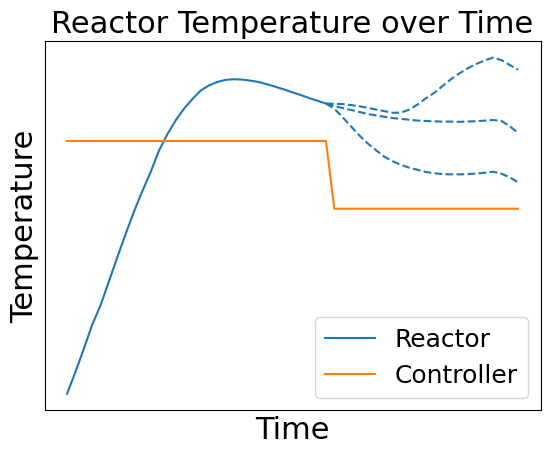

In [155]:
plt.plot(new_class_test.data.ytrain[0][0:32])
plt.plot(new_class_test.data.xtrain[0],color=cmap(1))
plt.plot(range(31,len(new_class_test.data.ytrain[0])),new_class_test.data.ytrain[0][31:],linestyle='--',color=cmap(0))
cmap = plt.get_cmap("tab10")

plt.plot(range(31,len(new_class_test.data.ytrain[0])),second_line,linestyle='--',color=cmap(0))
plt.plot(range(31,len(new_class_test.data.ytrain[0])),third_line,linestyle='--',color=cmap(0))

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False) # labels along the bottom edge are off
plt.title('Reactor Temperature over Time',fontdict={'size':22})
plt.xlabel('Time',fontdict={'size':22})
plt.ylabel('Temperature',fontdict={'size':22})
plt.legend(['Reactor','Controller'],loc=4, prop={'size': 18})

In [ ]:
self.use_unnormed_error_metrics

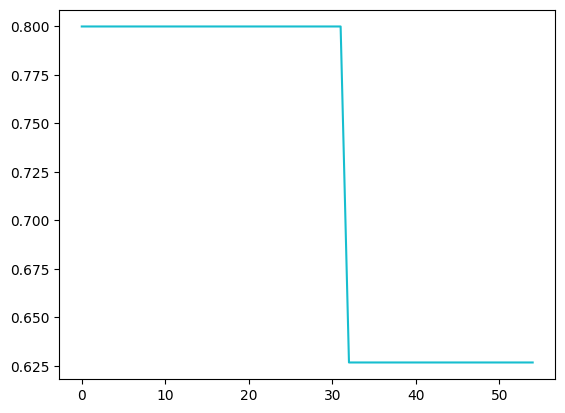

In [125]:
plt.plot(new_class_test.data.xtrain[0],color=cmap(11))

In [96]:
new_class_test.data.xtrain[0][32]

array([0.62666667])

In [10]:
new_class_test.train(resume=False)

transpiled circuits 0.975
saved circuits


In [12]:
fulldict['train_no_inputs_mse']=np.sqrt(new_class_test.mse_train)

In [14]:
new_class_test.val(resume=False)

Validation error == Train error: False. Relative difference: 0.054121069415513555


In [15]:
fulldict['val_no_inputs_mse']=np.sqrt(new_class_test.mse_val)

In [17]:
new_class_test.reinterpret_with_inputs()

Loaded counts from file


In [18]:
fulldict['train_with_inputs_mse']=np.sqrt(new_class_test.mse_train)

In [20]:
new_class_test.val_with_inputs(resume=False)
fulldict['val_with_inputs_mse']=np.sqrt(new_class_test.mse_val)

Validation error == Train error: False. Relative difference: 0.13934200903346652


In [21]:
new_class_test.mse_val

0.18360529924525873

In [22]:
new_class_test.reinterpret_only_inputs()

Loaded counts from file


In [23]:
fulldict['train_only_inputs_mse']=np.sqrt(new_class_test.mse_train)

In [24]:
new_class_test.val_only_inputs(resume=False)
fulldict['val_only_inputs_mse']=np.sqrt(new_class_test.mse_val)

Validation error == Train error: False. Relative difference: 0.07325731895728956


In [7]:
for instance in range(30):
    print('starting:',instance)
    Current_Dictionary={}

    c_rseed=instance
    d_rseed=5000+instance
    data = DataSource(xtype='reactor', ytype='reactor', xnorm='norm', ynorm='norm', rseed_data=d_rseed)

    fulldict['rseed']=c_rseed
    Current_Dictionary['rseed']=c_rseed
    Current_Dictionary['dseed']=d_rseed


    
    
    fulldict['file_name']='Experiment_'+str(instance)
    Current_Dictionary['file_name']='Experiment_'+str(instance)

    fulldict['confirm']=False

    
    
    
    

    for shots in [1000,2000,4000,8000,16000,32000,-1]:
        
        if shots>0: 
            fulldict['shots']=shots

        Current_Dictionary['shots']=shots

        for true_y in [True,False]:
            fulldict['use_true_y_in_val']=true_y
            Current_Dictionary['use_true_y_in_val']=true_y


            

            new_class_test= QRewindingRC_Neat(**fulldict)

            new_class_test.prepare(data)
            





            if shots > 0:
                
                # No inputs used: 
                new_class_test.train(resume=False)
                Current_Dictionary['train_no_inputs_mse']=np.sqrt(new_class_test.mse_train)

                new_class_test.val(resume=False)
                Current_Dictionary['val_no_inputs_mse']=np.sqrt(new_class_test.mse_val)

                # With inputs:
                new_class_test.reinterpret_with_inputs()
                Current_Dictionary['train_with_inputs_mse']=np.sqrt(new_class_test.mse_train)

                new_class_test.val_with_inputs(resume=False)
                Current_Dictionary['val_with_inputs_mse']=np.sqrt(new_class_test.mse_val)

                # only inputs:
                new_class_test.reinterpret_only_inputs()
                Current_Dictionary['train_only_inputs_mse']=np.sqrt(new_class_test.mse_train)

                new_class_test.val_only_inputs(resume=False)
                Current_Dictionary['val_only_inputs_mse']=np.sqrt(new_class_test.mse_val)

            else: #analytic version:
                #No inputs:
                new_class_test.analy_train(features='None')
                Current_Dictionary['train_no_inputs_mse']=np.sqrt(new_class_test.mse_train)

                new_class_test.analy_val(features='None')
                Current_Dictionary['val_no_inputs_mse']=np.sqrt(new_class_test.mse_val)
                
                #with inputs:
                new_class_test.analy_train(features='with_inputs')
                Current_Dictionary['train_with_inputs_mse']=np.sqrt(new_class_test.mse_train)

                new_class_test.analy_val(features='with_inputs')
                Current_Dictionary['val_with_inputs_mse']=np.sqrt(new_class_test.mse_val)

                #without inputs:
                new_class_test.analy_train(features='only_inputs')
                Current_Dictionary['train_only_inputs_mse']=np.sqrt(new_class_test.mse_train)

                new_class_test.analy_val(features='only_inputs')
                Current_Dictionary['val_only_inputs_mse']=np.sqrt(new_class_test.mse_val)
            
            List_of_Experiments.append(Current_Dictionary.copy())
            with open('Gathering_Results.pickle', 'wb') as handle:
                pkl.dump(List_of_Experiments, handle)



                





                
                
                

                
                

starting: 0
IQM
Using Hard-coded layout
transpiled circuits 0.975
saved circuits
Validation error == Train error: False. Relative difference: 0.19429099399632527
Loaded counts from file
Validation error == Train error: False. Relative difference: 0.6496876333272386
Loaded counts from file
Validation error == Train error: False. Relative difference: 0.5357639423367188
IQM
Using Hard-coded layout
transpiled circuits 0.975
saved circuits
Loaded counts from file
Loaded counts from file
IQM
Using Hard-coded layout
transpiled circuits 0.975
saved circuits
Validation error == Train error: False. Relative difference: 0.20203282532900343
Loaded counts from file
Validation error == Train error: False. Relative difference: 0.6528623793761447
Loaded counts from file
Validation error == Train error: False. Relative difference: 0.5357639423367188
IQM
Using Hard-coded layout
transpiled circuits 0.975
saved circuits
Loaded counts from file
Loaded counts from file
IQM
Using Hard-coded layout
transpiled

In [9]:
np.zeros([1,1,8]).reshape([1,-1])

array([[0., 0., 0., 0., 0., 0., 0., 0.]])

In [5]:
#with inputs:
new_class_test.analy_train(features='with_inputs')
Current_Dictionary['train_with_inputs_mse']=np.sqrt(new_class_test.mse_train)

new_class_test.analy_val(features='with_inputs')
Current_Dictionary['val_with_inputs_mse']=np.sqrt(new_class_test.mse_val)

Validation error == Train error: False. Relative difference: 0.05230894844352757


In [6]:
#with inputs:
new_class_test.analy_train(features='only_inputs')
Current_Dictionary['train_with_inputs_mse']=np.sqrt(new_class_test.mse_train)

new_class_test.analy_val(features='only_inputs')
Current_Dictionary['val_with_inputs_mse']=np.sqrt(new_class_test.mse_val)

Validation error == Train error: False. Relative difference: 0.07325731895728956


In [8]:
np.hstack([np.array([[1,2,3,]]),np.array([[1,2,3,]])])

array([[1, 2, 3, 1, 2, 3]])

In [2]:
with open('Gathering_Results.pickle', 'rb') as handle:
    List_of_Experiments=pkl.load(handle)

In [5]:
List_of_Experiments

[{'rseed': 0,
  'dseed': 5000,
  'file_name': 'Experiment_0',
  'shots': 1000,
  'use_true_y_in_val': True,
  'train_no_inputs_mse': 11.452489665082282,
  'val_no_inputs_mse': 12.515695464102292,
  'train_with_inputs_mse': 0.4079762154948072,
  'val_with_inputs_mse': 0.524005329869924,
  'train_only_inputs_mse': 0.4194172334758701,
  'val_only_inputs_mse': 0.5197667629574212},
 {'rseed': 0,
  'dseed': 5000,
  'file_name': 'Experiment_0',
  'shots': 1000,
  'use_true_y_in_val': False,
  'train_no_inputs_mse': 11.424934938524586,
  'val_no_inputs_mse': 13.46845070506515,
  'train_with_inputs_mse': 0.40928441208936134,
  'val_with_inputs_mse': 2.919497644758383,
  'train_only_inputs_mse': 0.4194172334758701,
  'val_only_inputs_mse': 2.863977888754912},
 {'rseed': 0,
  'dseed': 5000,
  'file_name': 'Experiment_0',
  'shots': 2000,
  'use_true_y_in_val': True,
  'train_no_inputs_mse': 11.313386573132883,
  'val_no_inputs_mse': 12.40368678007805,
  'train_with_inputs_mse': 0.4060523223273307

In [8]:
Expd=pd.DataFrame(List_of_Experiments)

In [11]:
Expd.get(["rseed",'train_only_inputs_mse'])

,rseed,train_only_inputs_mse
0,0,0.419417
1,0,0.419417
2,0,0.419417
3,0,0.419417
4,0,0.419417
...,...,...
131,9,0.442949
132,9,0.442949
133,9,0.442949
134,9,0.442949


<AxesSubplot: xlabel='rseed', ylabel='val_only_inputs_mse'>

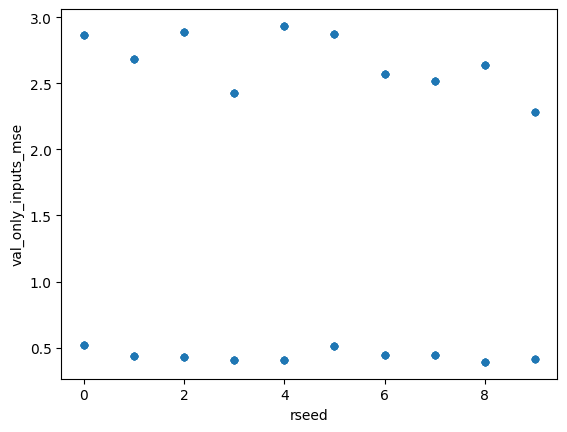

In [17]:
#Expd.plot.scatter("rseed",'train_only_inputs_mse')
Expd.plot.scatter("rseed",'val_only_inputs_mse')

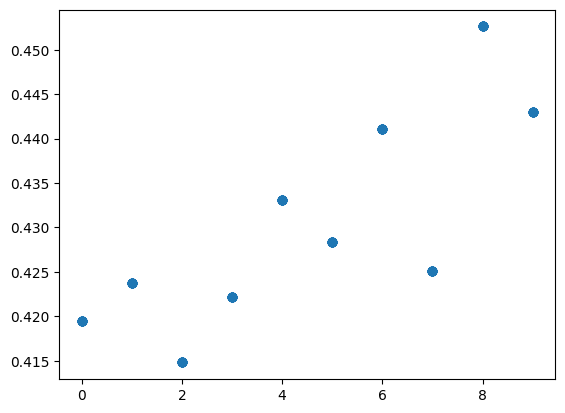

In [21]:
plt.scatter(Expd["rseed"].tolist(),Expd["train_only_inputs_mse"].tolist())

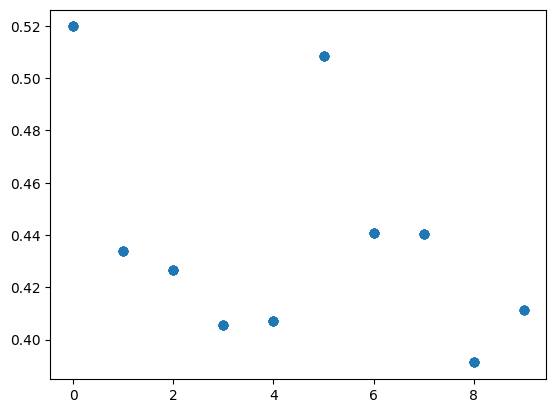

In [23]:
TrueY=Expd.loc[Expd['use_true_y_in_val'] == True]
FalseY=Expd.loc[Expd['use_true_y_in_val'] == False]


In [41]:
TrueY1000=TrueY.loc[TrueY['shots'] == 1000]
TrueY1=TrueY.loc[TrueY['shots'] == -1]

In [169]:
TrueY8000=TrueY.loc[TrueY['shots'] == 8000]

Text(0, 0.5, 'Root MSE')

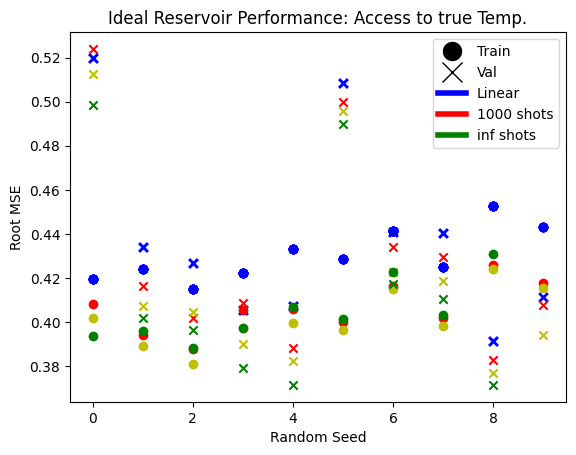

In [170]:
plt.scatter(TrueY["rseed"].tolist(),TrueY["train_only_inputs_mse"].tolist(),marker='o',color='b')
plt.scatter(TrueY["rseed"].tolist(),TrueY["val_only_inputs_mse"].tolist(),marker='x',color='b')
plt.scatter(TrueY1000["rseed"].tolist(),TrueY1000["train_with_inputs_mse"].tolist(),marker='o',color='r')
plt.scatter(TrueY1000["rseed"].tolist(),TrueY1000["val_with_inputs_mse"].tolist(),marker='x',color='r')
plt.scatter(TrueY8000["rseed"].tolist(),TrueY8000["train_with_inputs_mse"].tolist(),marker='o',color='y')
plt.scatter(TrueY8000["rseed"].tolist(),TrueY8000["val_with_inputs_mse"].tolist(),marker='x',color='y')
plt.scatter(TrueY1["rseed"].tolist(),TrueY1["train_with_inputs_mse"].tolist(),marker='o',color='g')
plt.scatter(TrueY1["rseed"].tolist(),TrueY1["val_with_inputs_mse"].tolist(),marker='x',color='g')
plt.legend(handles= [Line2D([0], [0], marker='o', color='w', label='Train',
                          markerfacecolor='black', markersize=15),
                    Line2D([0], [0], marker='x', color='black', label='Val',linestyle='None',
                          markerfacecolor='black', markersize=15),
                    Line2D([0], [0], color='b', lw=4, label='Linear'),
                    Line2D([0], [0], color='r', lw=4, label='1000 shots'),
                    Line2D([0], [0], color='g', lw=4, label='inf shots')

                          
                          
                          
                          ])
plt.title("Ideal Reservoir Performance: Access to true Temp.")
plt.xlabel("Random Seed")
plt.ylabel("Root MSE")


In [68]:
FalseY1000=FalseY.loc[FalseY['shots'] == 1000]
FalseY1=FalseY.loc[FalseY['shots'] == -1]

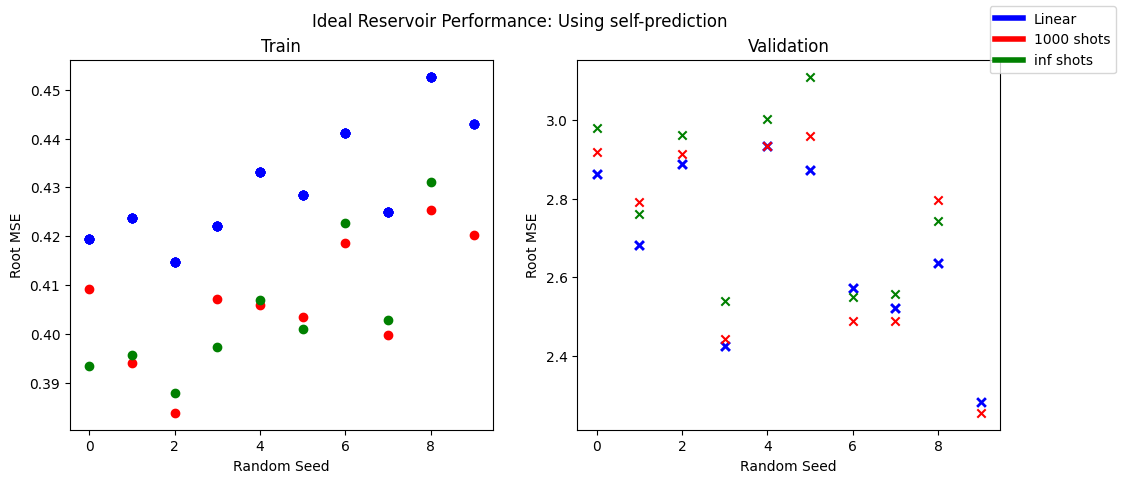

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.suptitle("Ideal Reservoir Performance: Using self-prediction")
#ax1.plot(x, y)
#ax2.plot(x, -y)
ax1.scatter(FalseY["rseed"].tolist(),FalseY["train_only_inputs_mse"].tolist(),marker='o',color='b')
ax2.scatter(FalseY["rseed"].tolist(),FalseY["val_only_inputs_mse"].tolist(),marker='x',color='b')
ax1.scatter(FalseY1000["rseed"].tolist(),FalseY1000["train_with_inputs_mse"].tolist(),marker='o',color='r')
ax2.scatter(FalseY1000["rseed"].tolist(),FalseY1000["val_with_inputs_mse"].tolist(),marker='x',color='r')
ax1.scatter(FalseY1["rseed"].tolist(),FalseY1["train_with_inputs_mse"].tolist(),marker='o',color='g')
ax2.scatter(FalseY1["rseed"].tolist(),FalseY1["val_with_inputs_mse"].tolist(),marker='x',color='g')

ax1.set_xlabel("Random Seed")
ax2.set_xlabel("Random Seed")
ax1.set_ylabel("Root MSE")
ax2.set_ylabel("Root MSE")
ax1.set_title('Train')
ax2.set_title('Validation')
fig.legend(handles= [
                    Line2D([0], [0], color='b', lw=4, label='Linear'),
                    Line2D([0], [0], color='r', lw=4, label='1000 shots'),
                    Line2D([0], [0], color='g', lw=4, label='inf shots')])

AttributeError: 'PathCollection' object has no attribute 'legend'

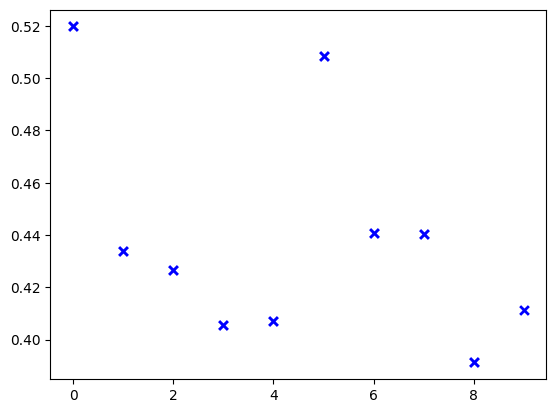

In [63]:
result = plt.scatter(TrueY["rseed"].tolist(),TrueY["val_only_inputs_mse"].tolist(),marker='x',color='b')
result.legend()
result.legend_elements()

In [33]:
Expd['shots'].tolist()

[1000,
 1000,
 2000,
 2000,
 4000,
 4000,
 8000,
 8000,
 16000,
 16000,
 32000,
 32000,
 -1,
 -1,
 1000,
 1000,
 2000,
 2000,
 4000,
 4000,
 8000,
 8000,
 16000,
 16000,
 32000,
 32000,
 -1,
 -1,
 1000,
 1000,
 2000,
 2000,
 4000,
 4000,
 8000,
 8000,
 16000,
 16000,
 32000,
 32000,
 -1,
 -1,
 1000,
 1000,
 2000,
 2000,
 4000,
 4000,
 8000,
 8000,
 16000,
 16000,
 32000,
 32000,
 -1,
 -1,
 1000,
 1000,
 2000,
 2000,
 4000,
 4000,
 8000,
 8000,
 16000,
 16000,
 32000,
 32000,
 -1,
 -1,
 1000,
 1000,
 2000,
 2000,
 4000,
 4000,
 8000,
 8000,
 16000,
 16000,
 32000,
 32000,
 -1,
 -1,
 1000,
 1000,
 2000,
 2000,
 4000,
 4000,
 8000,
 8000,
 16000,
 16000,
 32000,
 32000,
 -1,
 -1,
 1000,
 1000,
 2000,
 2000,
 4000,
 4000,
 8000,
 8000,
 16000,
 16000,
 32000,
 32000,
 -1,
 -1,
 1000,
 1000,
 2000,
 2000,
 4000,
 4000,
 8000,
 8000,
 16000,
 16000,
 32000,
 32000,
 -1,
 -1,
 1000,
 1000,
 2000,
 2000,
 4000,
 4000,
 8000,
 8000,
 16000,
 16000]

TypeError: 'NoneType' object is not subscriptable

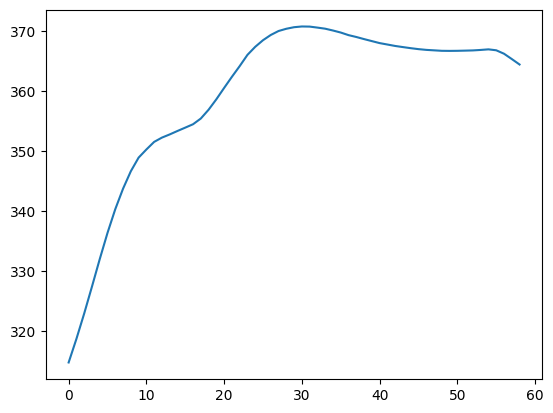

In [156]:
plt.plot(new_class_test.data.yval_nonorm[2])
plt.plot(new_class_test.yval_nonorm[2])

In [157]:
new_class_test.train(resume=False)

transpiled circuits 0.975
saved circuits


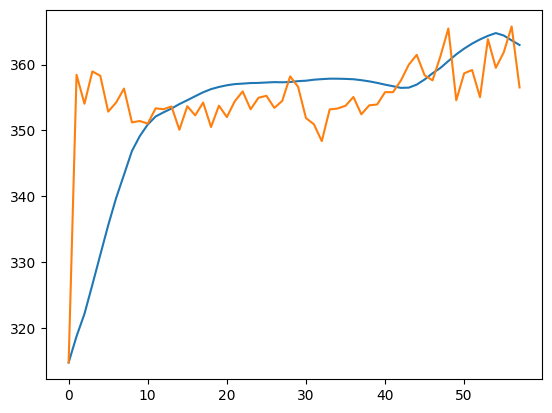

In [158]:
plt.plot(new_class_test.data.ytrain_nonorm[2])
plt.plot(new_class_test.ytrain_nonorm[2])

In [159]:
new_class_test.use_unnormed_error_metrics

True

In [160]:
new_class_test.mse_train

125.14567196308114

In [165]:
np.vstack([(new_class_test.ytrain_nonorm[i][1:]-new_class_test.data.ytrain_nonorm[i][1:])**2 for i in range(len(new_class_test.ytrain))]).mean()

125.14567196308114

In [168]:
[(new_class_test.ytrain_nonorm[i][1:]-new_class_test.data.ytrain_nonorm[i][1:])**2 for i in range(len(new_class_test.ytrain))]

[array([[1.66231098e+03],
        [1.27783985e+03],
        [8.51770561e+02],
        [4.77200093e+02],
        [3.95361588e+02],
        [9.17127782e+01],
        [5.43059504e+01],
        [1.53965380e+01],
        [2.34554491e+01],
        [2.66720836e+00],
        [3.63476665e-01],
        [3.37940101e+01],
        [4.26042971e+01],
        [4.55635902e+01],
        [2.10276091e+01],
        [7.81777482e+01],
        [1.34946332e+02],
        [4.81247072e+01],
        [6.64275621e+01],
        [1.34510365e+02],
        [9.07659397e+01],
        [1.47867052e+01],
        [4.70506766e+01],
        [3.31097792e+01],
        [8.20272512e+01],
        [9.07691843e+00],
        [1.49347501e+01],
        [3.41657636e+01],
        [1.69337773e+02],
        [3.34075408e+01],
        [1.15457810e+02],
        [1.60096976e+01],
        [8.03399935e+01],
        [1.55370898e+02],
        [3.89245382e+00],
        [3.86113008e+01],
        [2.07449603e+01],
        [1.71917943e+00],
        [2.7